# Autoencoder

### Installs dependencies

In [225]:
# Install dependencies
%pip install torch
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn


[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note

### Import dependencies

In [226]:
# Import all required libraries

import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Training the model

### Load and set up data sources

In [227]:
# Load all required data for training

# Load csv file
df_25 = pd.read_csv('../../data/care_to_compare/Wind Farm A/datasets/25.csv', delimiter=';')
df_13 = pd.read_csv('../../data/care_to_compare/Wind Farm A/datasets/13.csv', delimiter=';')
df_24 = pd.read_csv('../../data/care_to_compare/Wind Farm A/datasets/24.csv', delimiter=';')
df_3 = pd.read_csv('../../data/care_to_compare/Wind Farm A/datasets/3.csv', delimiter=';')
df_17 = pd.read_csv('../../data/care_to_compare/Wind Farm A/datasets/17.csv', delimiter=';')

# Combine dataframes

# Training on only one works
df = df_3

# When combining multiple the model returns nan
df = pd.concat([df_3, df_17])

train_data = df[df['train_test'] == 'train']
test_data = df[df['train_test'] == 'prediction']

# Keep only the required columns
train_data = train_data.drop(
    columns=['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id', 'sensor_1_avg', 'sensor_2_avg',
             'wind_speed_4_avg', 'sensor_5_avg', 'sensor_5_max', 'sensor_5_min', 'sensor_42_avg'])
test_data = test_data.drop(
    columns=['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id', 'sensor_1_avg', 'sensor_2_avg',
             'wind_speed_4_avg', 'sensor_5_avg', 'sensor_5_max', 'sensor_5_min', 'sensor_42_avg'])

train_data.head()

,sensor_0_avg,wind_speed_3_avg,wind_speed_3_max,wind_speed_3_min,wind_speed_3_std,sensor_5_std,sensor_6_avg,sensor_7_avg,sensor_8_avg,sensor_9_avg,...,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52_avg,sensor_52_max,sensor_52_min,sensor_52_std,sensor_53_avg
0,18.0,1.0,1.6,0.4,0.4,0.0,29.0,32.0,36.0,33.0,...,-1741.0,0.0,0.0,-1280.0,-1741.0,0.0,0.0,0.0,0.0,19.0
1,18.0,1.5,9.0,0.4,0.8,0.1,29.0,32.0,35.0,33.0,...,-1724.0,0.0,0.0,-1280.0,-1724.0,0.0,0.0,0.0,0.0,19.0
2,18.0,1.3,8.4,0.4,0.6,0.0,29.0,32.0,35.0,33.0,...,-1733.0,0.0,0.0,-1268.0,-1733.0,0.0,0.0,0.0,0.0,19.0
3,18.0,1.6,8.9,0.4,0.8,0.0,29.0,32.0,34.0,33.0,...,-1740.0,0.0,0.0,-1271.0,-1740.0,0.0,0.0,0.0,0.0,19.0
4,18.0,2.0,10.6,0.4,1.1,0.1,29.0,32.0,34.0,33.0,...,-1756.0,0.0,0.0,-1294.0,-1756.0,0.0,0.0,0.0,0.0,19.0


In [ ]:
train_data.describe()

In [229]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

train_data_normalized = scaler.fit_transform(train_data.values)
test_data_normalized = scaler.fit_transform(test_data.values)

#train_data_normalized = train_data.values
#test_data_normalized = data_test.values

# Create tensors  
train_data_normalized = torch.tensor(train_data_normalized, dtype=torch.float32)
test_data_normalized = torch.tensor(test_data_normalized, dtype=torch.float32)

# Create a DataLoader
batch_size = 256
dataset = TensorDataset(train_data_normalized)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

### Setup model

In [230]:
# Define the autoencoder model

class Autoencoder(torch.nn.Module):

    def __init__(self, input_size):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(input_size, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32)
        )

        # Decoder
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, input_size),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### Setup and configure training

In [ ]:
# Setup the model, loss function and optimizer

input_size = train_data.values.shape[1]
model = Autoencoder(input_size=input_size)

# Move to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

loss_fn = torch.nn.MSELoss()
#loss_fn = torch.nn.L1Loss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [232]:
# Setup training utility functions such as plot_loss, print_loss, save_model

loss_fn_name = loss_fn.__class__.__name__
optimizer_name = optimizer.__class__.__name__

learning_rate = optimizer.param_groups[0]['lr']

folder_name = f'./output/experiment_{loss_fn_name}_{optimizer_name}'

# If the folder exist add a number to the folder name
i = 1

while os.path.exists(folder_name):
    folder_name = f'./output/experiment_{loss_fn_name}_{optimizer_name}_{i}'
    i += 1

# Create folder
os.makedirs(folder_name)


def plot_loss(losses):
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Output plot to ./output/loss_plot.png
    plt.savefig(f'{folder_name}/loss_plot.png')


def print_loss(epoch, loss):
    print(f'Epoch {epoch}, Loss: {loss:.4f}')
    # Print to file ./output/loss.txt
    with open(f'{folder_name}/loss.txt', 'a') as f:
        f.write(f'Epoch {epoch}, Loss: {loss:.4f}\n')


def save_model(model, epoch):
    # Save model to ./output/model.pth
    torch.save(model.state_dict(), f'{folder_name}/model_{epoch}.pth')


print(f"Output folder: {folder_name}")

Output folder: ./output/experiment_MSELoss_Adam_16


Epoch 0, Loss: nan
Epoch 1, Loss: nan
Epoch 2, Loss: nan
Epoch 3, Loss: nan
Epoch 4, Loss: nan
Epoch 5, Loss: nan
Epoch 6, Loss: nan
Epoch 7, Loss: nan


KeyboardInterrupt: 

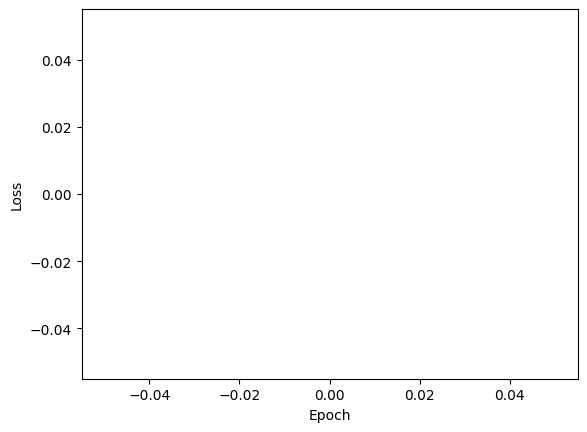

In [233]:
epochs = 100
losses = []

for epoch in range(epochs):
    for data in dataloader:
        values, = data

        # Move to GPU
        values = values.to(device)

        optimizer.zero_grad()
        output = model(values)

        loss = loss_fn(output, values)

        loss.backward()
        optimizer.step()

    losses.append(loss.item())

    plot_loss(losses)
    print_loss(epoch, loss.item())
    # plot loss and output to g ./output/loss_plot.png

    # Print the loss every 20th epoch
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.7f}')
        save_model(model, epoch)


## Evaluating the model

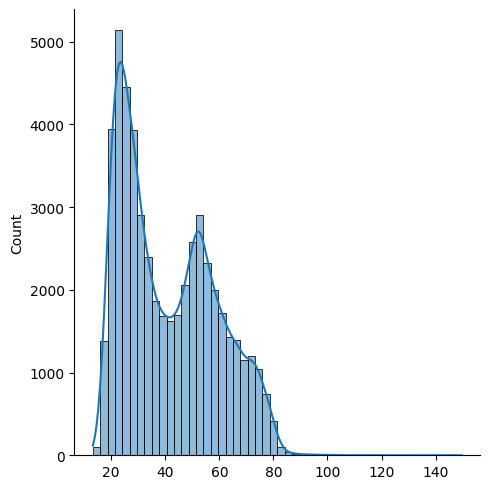

In [ ]:
# Use the model to predict the training data and plot the loss
# Use this to set a threshold for anomaly detection

# Inspired by: https://github.com/curiousily/Getting-Things-Done-with-Pytorch/blob/master/manuscript/06.time-series-anomaly-ecg.md

def predict(model, dataset):
    predictions, losses = [], []
    criterion = torch.nn.L1Loss(reduction='sum').to(device)
    with torch.no_grad():
        model = model.eval()
        for seq_true in dataset:
            seq_true = seq_true.to(device)
            seq_pred = model(seq_true)

            loss = criterion(seq_pred, seq_true)

            predictions.append(seq_pred.cpu().numpy().flatten())
            losses.append(loss.item())
    return predictions, losses


_, losses = predict(model, train_data_normalized)

sns.displot(losses, bins=50, kde=True);

Correct normal predictions: 2417/2423


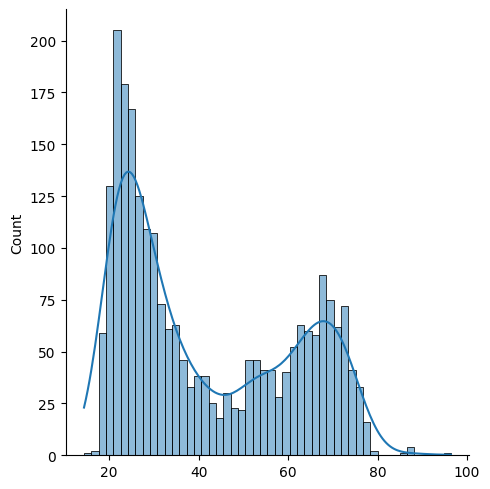

In [ ]:
# Use the model to predict the test data using a threshold based on the training data
THRESHOLD = 80

predictions, pred_losses = predict(model, test_data_normalized)
sns.displot(pred_losses, bins=50, kde=True);

correct = sum(l <= THRESHOLD for l in pred_losses)
print(f'Correct normal predictions: {correct}/{len(test_data_normalized)}')

In [ ]:
# Anamoly dataset
df_68 = pd.read_csv('../../data/care_to_compare/Wind Farm A/datasets/68.csv', delimiter=';')

# 68;anomaly;2015-07-29 13:20:00;52063;2015-08-12 13:10:00;54076;Transformer failure

# Filter out all data between id 52063 and 54076
anamoly_data = df_68[(df_68['id'] >= 52063) & (df_68['id'] <= 54076)]
normal_data = df_68[(df_68['id'] < 52063) | (df_68['id'] > 54076)]

anamoly_data = anamoly_data.drop(
    columns=['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id', 'sensor_1_avg', 'sensor_2_avg',
             'wind_speed_4_avg', 'sensor_5_avg', 'sensor_5_max', 'sensor_5_min', 'sensor_42_avg'])
normal_data = normal_data.drop(
    columns=['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id', 'sensor_1_avg', 'sensor_2_avg',
             'wind_speed_4_avg', 'sensor_5_avg', 'sensor_5_max', 'sensor_5_min', 'sensor_42_avg'])

anamoly_data_normalized = scaler.fit_transform(anamoly_data.values)
anamoly_data_normalized = torch.tensor(anamoly_data_normalized, dtype=torch.float32)

normal_data_normalized = scaler.fit_transform(normal_data.values)
normal_data_normalized = torch.tensor(normal_data_normalized, dtype=torch.float32)

In [ ]:
an_predictions, an_pred_losses = predict(model, anamoly_data_normalized)
no_predictions, no_pred_losses = predict(model, normal_data_normalized)

Correct anomaly predictions: 116/2014
Correct anomaly predictions: 51918/52344


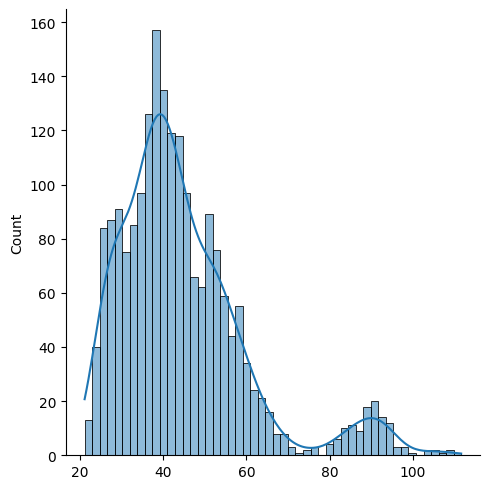

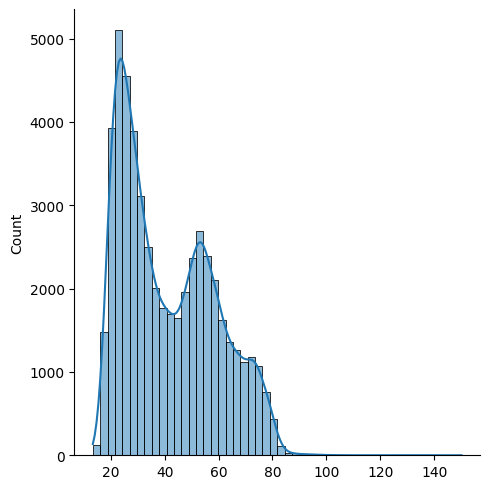

In [ ]:
sns.displot(an_pred_losses, bins=50, kde=True);
sns.displot(no_pred_losses, bins=50, kde=True);

correct = sum(l > THRESHOLD for l in an_pred_losses)
print(f'Correct anomaly predictions: {correct}/{len(anamoly_data_normalized)}')

correct = sum(l < THRESHOLD for l in no_pred_losses)
print(f'Correct anomaly predictions: {correct}/{len(normal_data_normalized)}')